![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: funções inversas

Neste teste, iremos analisar a função $f(x) = x e^x$, para construir a função inversa $g(y) = x$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1: Análise da função

## 1.1 Gráfico

Em geral, uma boa forma de analisar uma função é fazendo o gráfico dela.

Faça um gráfico de $f$ no intervalo $[-4,1]$. Também indique:
- um título; e
- dê nome aos eixos.

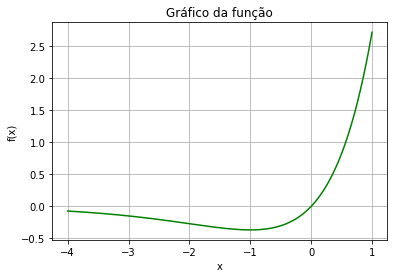

In [2]:
def f(x): 
  return x* np.exp(x)

X = np.linspace(-4, 1, 500)
F = np.vectorize(f)
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.title("Gráfico da função")
plt.rcParams['figure.figsize'] = (16,4)
ax.plot(X, F(X), 'g-')
ax.grid()
plt.show()


In [3]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [4]:
valores = ax.lines[0].get_ydata()
a, b = min(valores), max(valores)
assert np.isclose(a, -0.36787944117144, atol=1e-4)
assert np.isclose(b, 2.718281828459045, atol=1e-4)

In [5]:
ax = None

## 1.2: Mínimos e Máximos

Se uma função troca a direção de crescimento, isso muda a análise das raízes.
Portanto, é importante saber onde estão os máximos e mínimos locais de $f$.

Calcule (analiticamente) a derivada de $f$, e indique o(s) ponto(s) em que ela se anula.

São pontos de máximo ou de mínimo?

A derivada de $f$ segue a regra do produto para derivação e é igual a: $ f'(x) = e^x (x+1)$.

Para o cálculo dos valores máximos ou mínimos, deve-se igualar a derivada a $0$,
logo $  e^x (x+1) = 0 $. Então, o ponto em que a derivada se anula é, $(x+1) = 0$ ou $x=-1$. 

Agora, faça uma figura com dois gráficos:
- No primeiro, o gráfico da derivada de $f$ no mesmo intervalo $[-4, 1]$;
- Ao lado, um "zoom" em uma região que você considere importante.

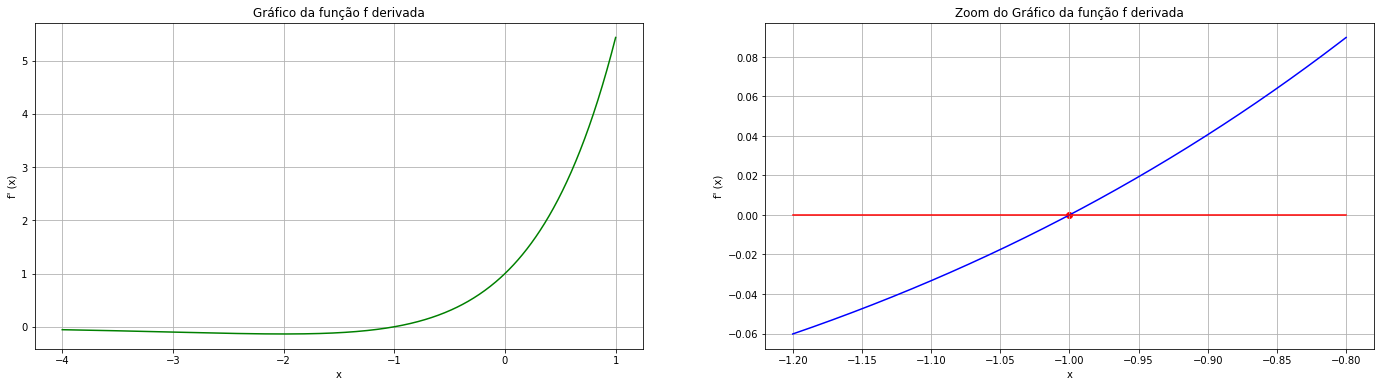

In [6]:
def der(x):
  return np.exp(x) * (x+1)

DER = np.vectorize(der)
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(24,6))

ax1.set_xlabel("x")
ax1.set_ylabel("f' (x)")
ax1.set_title("Gráfico da função f derivada")
ax1.plot(X, DER(X), 'g-')
ax1.grid()

def g(x):
  return 0

G = np.vectorize(g)
Y = np.linspace(-1.2, -0.8, 500)

ax2.set_xlabel("x")
ax2.set_ylabel("f' (x)")
ax2.set_title("Zoom do Gráfico da função f derivada")
ax2.plot(Y, der(Y), 'b-')
ax2.plot(Y, G(Y), 'r-')
ax2.scatter(-1, 0, color="red")
ax2.grid()

plt.show()

#Onde temos a derivada=0, é o ponto de minimo ou maximo! 

Como estes gráficos ajudam a confirmar os mínimos e máximos que você calculou?

Esses gráficos podem auxiliar na confirmação de maximos e minimos, porque no primeiro gráfico da função $f$, é possível observar que a função possui uma curvatura e que o valor mínimo de $f(x)$ está visualmente igual ao valor calculado analiticamente.
Ao plotar o gráfico da derivada, é possivel identificar com maior clareza onde está localizado o minimo da função, já que onde a derivada possuir valor igual a $0$, é o ponto desejado. Nesse caso, é possível  fazer uma interesecção com uma reta $y=0$, que ajuda a identificar que realmente o ponto minimo está no valor de $x=-1$.

## 1.3: Número de raízes

Usando a informação da derivada da função, seus maximo(s) e minimo(s), responda: 

Quantas raizes a equação $f(x) = y$ tem para cada valor de $y$?

Possui apenas uma raiz para cada valor de $y$ dentro do intervalo onde  $y= (0,\infty )$  e possui duas raizes dentro do intervalo de $y= (-\infty , 0]$

# Questão 2: Construindo a função inversa

A maior dificuldade de usar a bisseção para construir a função inversa é que precisamos de um intervalo onde a raiz estará.

## 2.1: Gráficos para limitar a bisseção

Faça um gráfico das funções $x e^x$ e $e^x$ e veja que,
para $y$ suficientemente grande,
a raiz estará sempre abaixo de $\log y$.
Isso permite achar um limite superior para um intervalo de bisseção.

Escolha um intervalo razoável para o gráfico, que ajude a observar quão "grande" $y$ deve ser.

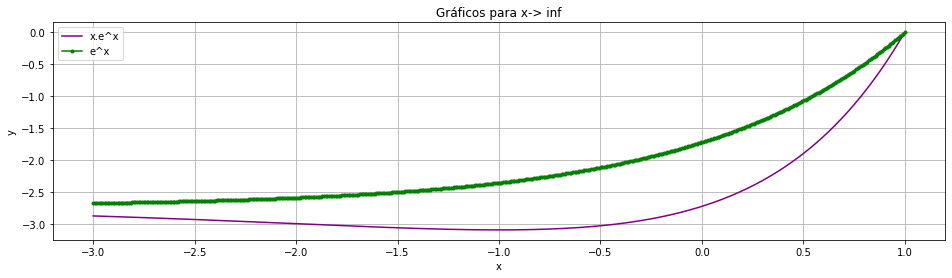

In [7]:
y = np.e

Z = np.linspace(-3, np.log(y) , 500)
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.title("Gráficos para x-> inf")
plt.rcParams['figure.figsize'] = (16,4)
ax.plot(Z, F(Z)-y , color = 'purple',  label='x.e^x')
ax.plot(Z, np.exp(Z) -y,  color = 'green',marker=".",  label='e^x')
ax.grid()
plt.legend()
plt.show()



In [8]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

Agora, falta estudar o que acontece quando $x \to -\infty$.

Faça o gráfico de $f$ e o de $1/x$ para $x \in [-4, -1]$.

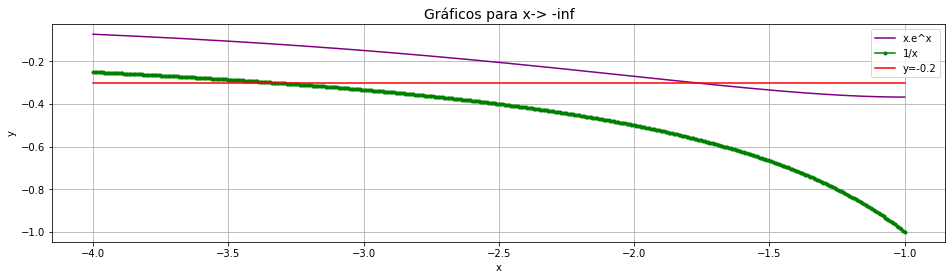

In [9]:
def f1(x): 
  return 1/x

def aux(x):
  return -0.3

X = np.linspace(-4, -1, 500)
F1 = np.vectorize(f1)
AUX = np.vectorize(aux)

ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.title("Gráficos para x-> -inf", {'fontsize': 14})
plt.rcParams['figure.figsize'] = (16,4)
ax.plot(X, F(X), color = 'purple',  label='x.e^x')
ax.plot(X, F1(X),  color = 'green',marker=".",  label='1/x')
ax.plot(X, AUX(X),  color = 'red', label='y=-0.2')
ax.grid()
plt.legend()
plt.show()


Explique porque (usando o gráfico e outras contas, se você julgar necessário),
quando $f(x) = y$ tem uma raiz "muito negativa",
esta raiz é menor (em valor absoluto) do que a raiz de $1/x = y$.

Podemos observar utilizando o gráfico acima que para as raizes onde f(x)=y, temos que y possui um valor maior para todo o intervalo analisado quando comparado a funcao 1/x. Por este motivo, para um mesmo valor de y, teremos que a raiz na funcao f(x) em valor absoluto sera muito menor em comparacao a da funcao 1/x.

 Para ilustrar o desenvolvimento acima, coloquei uma reta y= -0.3, para ilustrar onde as raizes de ambas funções são encontradas. Podemos perceber que para qualquer outro valor de y, o ponto de intersecçao de f(x) encontra-se à direita do ponto de intersecção com a funcao 1/x. Isso significa, que a raiz de esta ultima funcao, é sempre menor do que para a funcao inicial f(x). Como estamos analizando o espaco onde $x \to -\infty$, temos que o valor absoluto das raizes, terá sempre 1/x=y muito maior que o valor de f(x)=y

## 2.2: A função inversa propriamente dita

Agora, programe a função inversa de $f$ (chamada $g$),
que retorne **todas** as soluções de $f(x) = y$ em uma lista.

Se não houver raízes, retorne a lista vazia.

In [10]:

def bissecao(f, a, b, xtol=1e-8, ytol=1e-10):
    a,b = sorted( [a,b] )
    
    err = abs(b-a)
    aux = a
    it = 0
    ncalls = 0 
    yerr = 0
    maxiter = 100

    while err >= xtol or yerr <= ytol:
        if (it > maxiter):
          return x

        x = (a+b)/2.0
        
        if f(x)*f(a) < 0:
            b = x
        else:
            ncalls +=2
            if f(x)*f(a) == 0:
                return x
            a = x

        yerr = abs(f(x))
        err = abs(x-aux)
        aux = x
        it += 1

    return x


In [11]:
def g(y, xtol=1e-8, ytol=1e-8):
  
  f = lambda x: x * np.e**x - y

  raizes = []
  
  if( y >= 0 ):
    #Uma raiz positiva

    if (y >= np.e):
      r = bissecao( f, 0, np.log(y), xtol, ytol)
      raizes.append(r)  
    else:
      r = bissecao( f, 0, np.e, xtol, ytol)
      raizes.append(r)     
  elif (y < 0 and y > -1/np.e) :
      # Para a raiz mais negativa
      r = bissecao(f, 1/y, -1, xtol, ytol)
      raizes.append(r)
      # Para a raiz mais próxima de zero
      r = bissecao(f,-1, 0, xtol, ytol)
      raizes.append(r)
  elif y == -1/np.e:
        raizes.append(-1)

  return raizes

In [12]:
r1 = g(1)[0]
assert np.isclose(r1, 0.5671432904097838)
assert np.isclose(f(r1), 1)

In [13]:
assert g(-1) == []

In [14]:
r1, r2 = g(-0.1)
assert np.isclose(f(r1), -0.1)
assert np.isclose(f(r2), -0.1)
assert abs(r1 - r2) > 1

In [15]:
r1 = g(200)[0]
assert np.isclose(f(r1), 200)

# Questão 3:  Mudança de Variaveis

Vamos modificar um pouco nossa equação $x e^x = y$.

Para cada um dos casos, ache as raízes a partir de uma mudança de variáveis para transformar a equação em algo da forma

$$ u e^u = t. $$
**Escreva sempre qual foi a mudança de variaveis feita**, relacionando $t$ com $y$ e $u$ com $x$.

Dica: Ache uma mudança de variáveis "na mão" para as funções,
utilize o código da questão anterior para descobrir as raízes "transformadas" $u$,
e depois volte para as variáveis $x$

## 3.1: Expoentes diferentes

Resolva $x e^{2x} = 7$

Para mudança de variável, substituirei os seguintes valores: 

$ u = 2x $

Logo, $x = \frac{u}{2}$

$x e^{2x} =\frac{u}{2} e^u = 7$ 

Por fim, temos que:  $u e^u = 2 \cdot 7 = 14 $ 

$t =14$

In [16]:
u = g(14)[0]
x = u/2

In [17]:
assert np.isclose(x * np.exp(2*x), 7)

## 3.2: Parte linear diferente

Encontre as duas raízes de $(x  + 1) e^{x} = -\frac{1}{10}$.

Substituindo os seguintes valores para mudança de variável:

$u = x + 1$


$u e^{u - 1} = \frac{-1}{10}$

$u \frac{e^{u}}{e} = \frac{-1}{10}$

Passando $e$ para  o outro lado:

$u e^u = \frac{-e}{10}$

Logo, temos que $t = \frac{-e}{10}$

In [18]:
u = g(-np.e/10)
x1 = u[0] - 1
x2 = u[1] - 1

In [19]:
assert np.isclose((x1+1)*np.exp(x1), -0.1)
assert np.isclose((x2+1)*np.exp(x2), -0.1)
assert abs(x1 - x2) > 1

## 3.3: Mudança genérica de variáveis

Para resolver a equação

$$(x + a)e^{bx} = c, \quad \text{com $b \neq 0$},$$

podemos fazer uma mudança de variáveis (em função de $a$ e $b$)
para transformar em uma equação $u e^u = t$.

Explique qual é a mudança a ser feita.

Para esta equação, os valores substituidos são:

$u = b (x + a)$

Logo, $\frac{u}{b} =(x + a)$ ou $u = bx + ba \rightarrow bx= u-ba $ 

Substituindo esses valores encontrados, temos
$\frac{u}{b} e^{u - ba} = c$

$\frac{u \cdot e^u }{b \cdot e^{ba}}  = c$

$u e^u = bce^{ba}$

$t = bce^{ba}$

Agora, faça um programa que recebe os parâmetros $a$, $b$ e $c$
e retorna uma lista com as soluções.

Dica: use uma _list comprehension_  para fazer a transformação inversa.

In [20]:
def solução_geral(a,b,c):
    """Soluções da equação (x+a)e^{bx} = c"""
    assert b != 0
    s = g( b*c* (np.e**(b*a)) )
    return [ (x/b) - a for x in s]

Testes

In [21]:
def geral(x, a, b):
    return (x+a)*np.exp(b*x)

In [22]:
r1 = solução_geral(0, 1, 2)[0]
assert np.isclose(geral(r1, 0, 1), 2)

In [23]:
r1 = solução_geral(3, 2, 2)[0]
assert np.isclose(geral(r1, 3, 2), 2)

In [24]:
r1 = solução_geral(-1, -1, -1)[0]
assert np.isclose(r1, 0)

In [25]:
r1, r2 = solução_geral(-4, -1, 0.005)
assert np.isclose(geral(r1, -4, -1), 0.005)
assert np.isclose(geral(r2, -4, -1), 0.005)
assert np.abs(r1 - r2) > 1

# Questão 4: Uma outra função... (Bônus)

Vamos aplicar o mesmo raciocínio das questões anteriores para uma função um pouco diferente. 

Faça o gráfico da função $h(x) = x - \log(x)$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


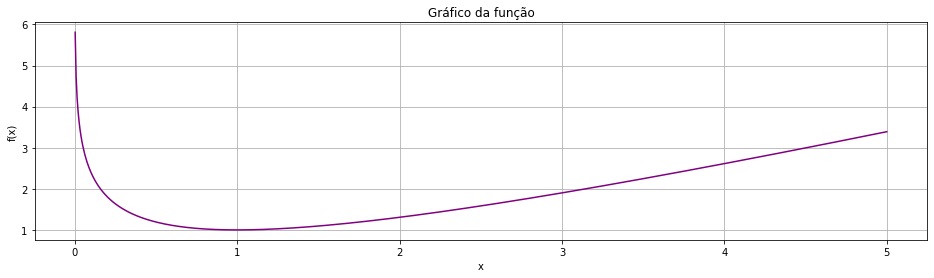

In [26]:

X = np.linspace(-1, 5, 1000)
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.title("Gráfico da função")
plt.rcParams['figure.figsize'] = (12,4)
ax.plot(X,  X - np.log(X), color='purple')
ax.grid()
plt.show()


Ao variar o y, o que acontecerá com o número de raízes?
Essa função pode ter mais de 2 raizes?

Pode ser observado pelo gráfico que o mínimo da função está em x=1. Desse modo, para valores de  $y$ inferiores a $1$, a função não tem raiz.  Isso também é percetivel pelo fato de que a função está acima do eixo $x$, então a função so passa a ter mais que duas raízes, após o seu ponto mínimo ser transladado até o eixo das abcissas. 

Logo, essa função não pode ter mais de $2$ raizes, porque ela so apresenta um ponto de mínimo e somente nesse valor ela troca seu sentido (crescimento ou decrescimento).

